# Import Libraries

In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load Dataset

In [39]:
url="https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv"
df=pd.read_csv(url)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Class Imbalance

In [40]:
print(df['Class'].value_counts())

Class
0    763
1      9
Name: count, dtype: int64


# Visualization

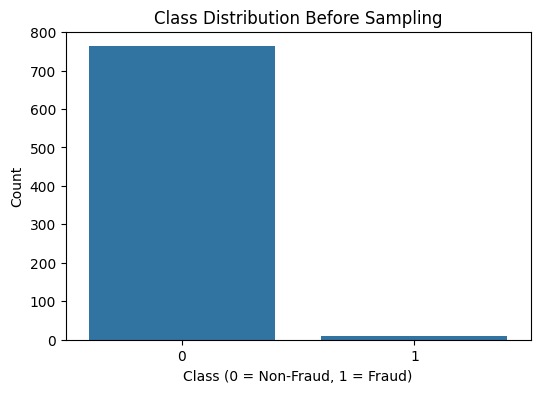

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class',data=df)
plt.title("Class Distribution Before Sampling")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

##### The dataset is highly imbalanced, where non-fraudulent transactions dominate the dataset. Training machine learning models on such data can lead to biased predictions. Therefore, Sampling techniques are required to balance the classes.

# Split Features and Target

In [42]:
X=df.drop('Class',axis=1)
y=df['Class']

# Import Sampling Techniques

In [43]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN

# Five Sampling Techniques



In [44]:
sampling_methods = {
    "Random_Undersampling":RandomUnderSampler(random_state=42),
    "Random_Oversampling":RandomOverSampler(random_state=42),
    "SMOTE":SMOTE(random_state=42),
    "SMOTEENN":SMOTEENN(random_state=42),
    "NearMiss":NearMiss()
}


# Check Goodness of Sample

In [49]:
def check_sample_goodness(y_sample, title, ax):
    counts = y_sample.value_counts().sort_index()

    sns.barplot(x=counts.index, y=counts.values, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Class")
    ax.set_ylabel("Count")
    ax.legend(
        labels=["Class 0 (Non-Fraud)", "Class 1 (Fraud)"],
        loc="upper right"
    )


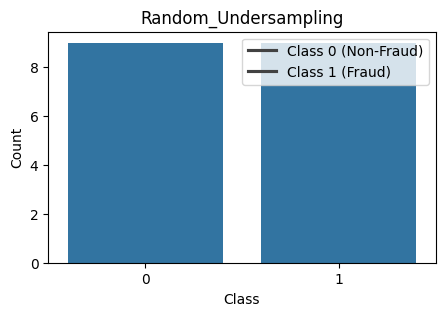

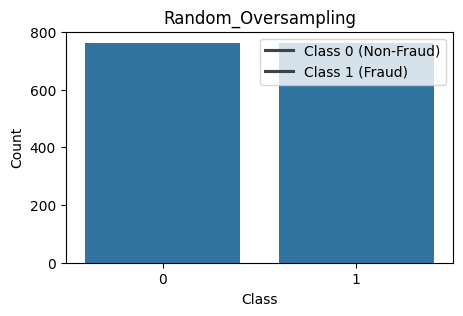

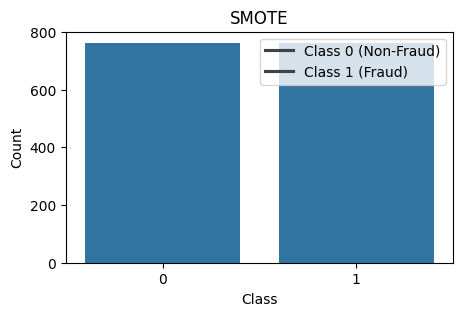

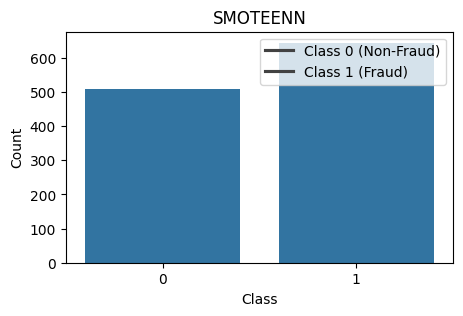

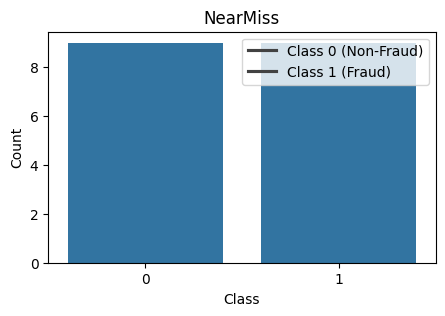

In [51]:
for name, sampler in sampling_methods.items():
    X_res, y_res = sampler.fit_resample(X, y)

    plt.figure(figsize=(5, 3))
    check_sample_goodness(y_res, name, plt.gca())
    plt.show()

    print("\n")


# Five ML Model

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "LogisticRegression":LogisticRegression(max_iter=1000),
    "DecisionTree":DecisionTreeClassifier(),
    "RandomForest":RandomForestClassifier(),
    "KNN":KNeighborsClassifier(),
    "SVM":SVC()
}


In [53]:
results = pd.DataFrame(index=models.keys(),columns=sampling_methods.keys())

for samp_name,sampler in sampling_methods.items():
    X_res,y_res=sampler.fit_resample(X, y)

    X_train,X_test,y_train,y_test=train_test_split(
        X_res,y_res,test_size=0.3,random_state=42
    )

    for model_name, model in models.items():
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        acc=accuracy_score(y_test, y_pred)
        results.loc[model_name, samp_name]=round(acc * 100, 2)


In [54]:
results

,Random_Undersampling,Random_Oversampling,SMOTE,SMOTEENN,NearMiss
LogisticRegression,66.67,91.7,90.39,96.24,50.0
DecisionTree,66.67,98.47,98.25,98.84,16.67
RandomForest,50.0,100.0,99.13,99.71,16.67
KNN,16.67,98.47,84.72,94.22,83.33
SVM,16.67,68.56,67.69,69.65,16.67


# Result Visualization

<Figure size 1000x600 with 0 Axes>

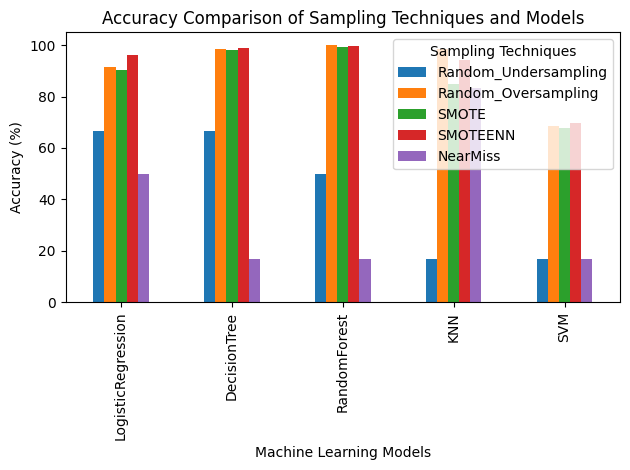

In [55]:
results = results.astype(float)

plt.figure(figsize=(10,6))
results.plot(kind='bar')
plt.title("Accuracy Comparison of Sampling Techniques and Models")
plt.ylabel("Accuracy (%)")
plt.xlabel("Machine Learning Models")
plt.legend(title="Sampling Techniques")
plt.tight_layout()
plt.show()

### Observations

- Different sampling techniques affect model performance.
- Oversampling methods usually improve accuracy on imbalanced data.
- Undersampling may lead to loss of useful information.
- Choosing the right sampling technique is crucial for reliable model results.
